# Network Dynamics: Node Centrality - Lab

## Introduction

In this lab, you'll get a chance to practice implementing and interpreting the centrality metrics from the previous section. You'll do this be investigating the social network from Game of Thrones!

## Objectives
You will be able to:
- Understand and explain network centrality and its importance in graph analysis
- Understand and calculate Degree, Closeness, Betweenness and Eigenvector centrality measures
- Describe the use case for several centrality measures

## Character Interaction Graph Data

A. J. Beveridge, and J. Shan  created a network from George R. Martin's "A song of ice and fire" by extracting relationships between characters of the story. [The dataset is available at Github](https://github.com/mathbeveridge/asoiaf). Relationships between characters were formed every time a character's name appears within 15 words of another character. This was designed as an approximate metric for character's interactions with each other. The results of this simple analysis are quite profound and produce interesting visuals such as this graph:

<img src="images/got.png" width=800>

With that, it's your turn to start investigating the most central characters!

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##  Load the dataset 

Start by loading the dataset as a pandas DataFrame. From this, you'll then create a network representation of the dataset using NetworkX. 

The dataset is stored in the file `asoiaf-all-edges.csv`.

In [2]:
# Load edges into dataframes
df1 = pd.read_csv('asoiaf-all-edges.csv')
df1.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


## Create a Graph

Now that you have the data loaded as a pandas DataFrame, iterate through the data and create appropriate edges to the empty graph you instantiated above. Be sure to add the weight to each edge.

In [3]:
# Create an empty graph instance

g = nx.Graph()

edges = list(zip(df1.Source, df1.Target, df1.weight))

for s,t,w in edges:
    g.add_edge(s,t, weight=w)

## Calculate Degree

To start the investigation of the most central characters in the books, calculate the degree centrality for each character. Then create a bar graph of the top 10 characters according to degree centrality.

In [4]:
dc_tuples = [(k,v) for k,v in nx.degree_centrality(g).items()]

In [5]:
top10_centrality = sorted(dc_tuples, key=lambda x: x[1], reverse=True)[:10]
top10_centrality

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118),
 ('Arya-Stark', 0.10566037735849056),
 ('Catelyn-Stark', 0.09433962264150943),
 ('Sansa-Stark', 0.09433962264150943),
 ('Robb-Stark', 0.0930817610062893),
 ('Eddard-Stark', 0.0930817610062893)]

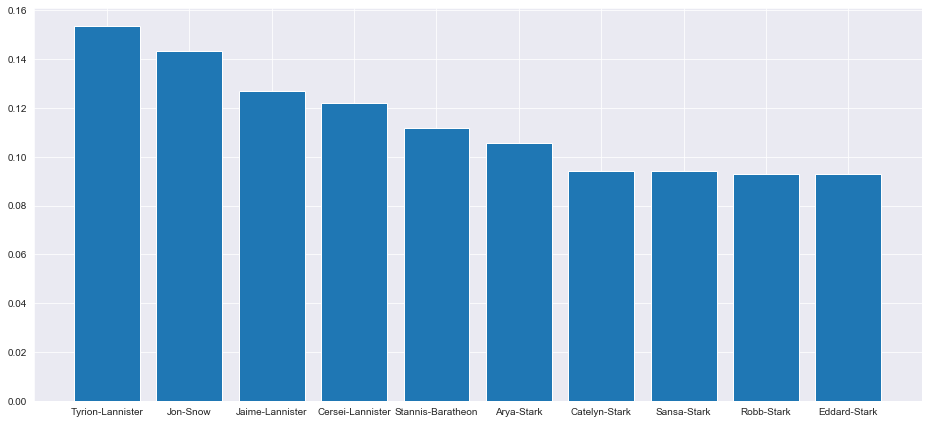

In [6]:
plt.figure(figsize=(13,6))
plt.bar([t[0] for t in top10_centrality], [t[1] for t in top10_centrality])
plt.tight_layout()
plt.show()

## Closeness Centrality

Repeat the above exercise for the top 10 characters according to closeness centrality.

In [7]:
cc_tuples = [(k,v) for k,v in nx.closeness_centrality(g).items()]

In [8]:
top10_cl_centrality = sorted(cc_tuples, key=lambda x: x[1], reverse=True)[:10]
top10_cl_centrality

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042),
 ('Jon-Snow', 0.44537815126050423),
 ('Stannis-Baratheon', 0.4446308724832215),
 ('Robb-Stark', 0.4441340782122905),
 ('Joffrey-Baratheon', 0.4339519650655022),
 ('Catelyn-Stark', 0.4334787350054526)]

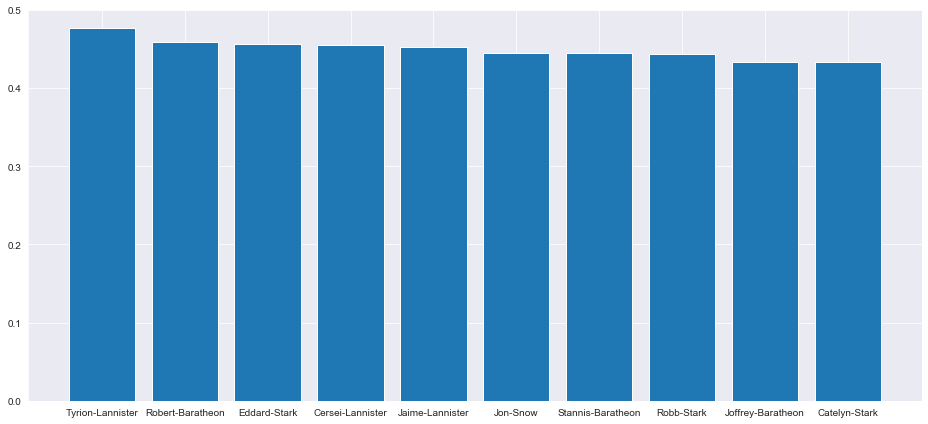

In [9]:
plt.figure(figsize=(13,6))
plt.bar([t[0] for t in top10_cl_centrality], [t[1] for t in top10_cl_centrality])
plt.tight_layout()
plt.show()

## Betweeness Centrality

Repeat the process one more time for betweeness centrality.

In [10]:
bc_tuples = [(k,v) for k,v in nx.betweenness_centrality(g).items()]

In [11]:
top10_bc_centrality = sorted(bc_tuples, key=lambda x: x[1], reverse=True)[:10]
top10_bc_centrality

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566),
 ('Jaime-Lannister', 0.10083800602581632),
 ('Cersei-Lannister', 0.08870426655860289),
 ('Arya-Stark', 0.08724236063571153),
 ('Eddard-Stark', 0.07873239257251873),
 ('Robert-Baratheon', 0.07822769060383258)]

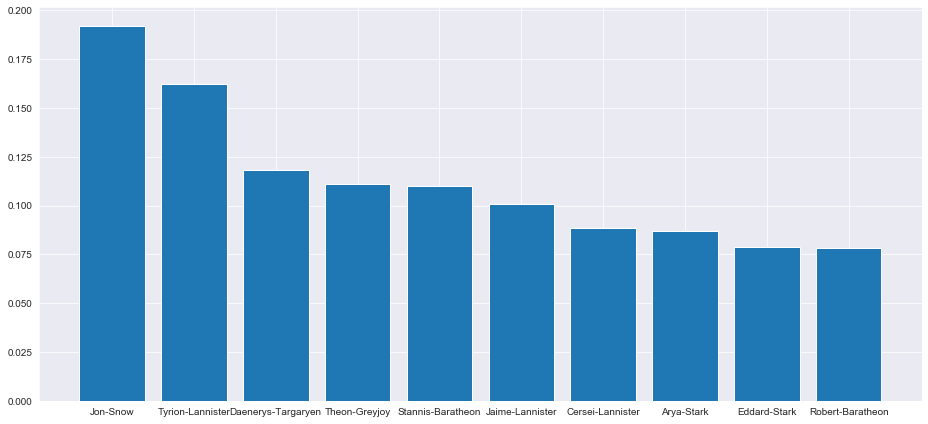

In [12]:
plt.figure(figsize=(13,6))
plt.bar([t[0] for t in top10_bc_centrality], [t[1] for t in top10_bc_centrality])
plt.tight_layout()
plt.show()

## Eigenvector Centrality

In [13]:
ec_tuples = [(k,v) for k,v in nx.eigenvector_centrality(g).items()]

In [14]:
top10_ec_centrality = sorted(ec_tuples, key=lambda x: x[1], reverse=True)[:10]
top10_ec_centrality

[('Tyrion-Lannister', 0.25155836369082013),
 ('Cersei-Lannister', 0.2357712102434478),
 ('Jaime-Lannister', 0.2263385016604407),
 ('Joffrey-Baratheon', 0.2143762701904281),
 ('Sansa-Stark', 0.20584216286964804),
 ('Robert-Baratheon', 0.19437504050942284),
 ('Eddard-Stark', 0.19165954952371533),
 ('Stannis-Baratheon', 0.18208517838192134),
 ('Catelyn-Stark', 0.17588556613451878),
 ('Robb-Stark', 0.17319627185782438)]

In [15]:
ec_centrality = sorted(ec_tuples)

## Putting it All Together

Great! Now try putting all of these metrics together along with eigenvector centrality. Combine all four metrics into a single dataframe for each character.

In [16]:
characters = sorted(g.nodes())

In [17]:
centrality = sorted(dc_tuples)

In [18]:
df = pd.DataFrame(np.array([characters, [t[1] for t in centrality]]).T, columns = ['Character', 'DC'])

In [19]:
closeness_centrality = sorted(cc_tuples)

In [20]:
between_centrality = sorted(bc_tuples)

In [21]:
df['CC'] = [t[1] for t in closeness_centrality]
df['BC'] = [t[1] for t in between_centrality]

In [22]:
df['EC'] = [t[1] for t in ec_centrality]

In [23]:
df.set_index('Character', inplace=True)
df.head()

,DC,CC,BC,EC
Character,,,,
Addam-Marbrand,0.01509433962264151,0.345803,0.000470,0.052658
Aegon-Frey-(son-of-Stevron),0.005031446540880503,0.313609,0.000000,0.014688
Aegon-I-Targaryen,0.011320754716981131,0.361692,0.006891,0.025584
Aegon-Targaryen-(son-of-Rhaegar),0.018867924528301886,0.342230,0.006012,0.024691
Aegon-V-Targaryen,0.0012578616352201257,0.262636,0.000000,0.001226


In [24]:
df.DC = df.DC.astype(float)

## Identifying Key Players

While centrality can tell us a lot, you've also begun to see how certain individuals may not be the most central characters, but can be pivotal in the flow of information from one community to another. In the previous lesson, such nodes were labeled as 'bridges' acting as the intermediaries between two clusters. Try and identify such characters from this dataset.

In [25]:
df['bridgeness'] = df.BC/df.DC
df = df.sort_values(by='bridgeness', ascending=False)
df.head()

,DC,CC,BC,EC,bridgeness
Character,,,,,
Aggar,0.005031,0.269036,0.007997,0.001665,1.589358
Alleras,0.010063,0.272915,0.014199,0.002928,1.411040
Theon-Greyjoy,0.083019,0.423323,0.111283,0.102481,1.340458
Jon-Snow,0.143396,0.445378,0.192120,0.144211,1.339782
Cutjack,0.003774,0.255135,0.005028,0.001404,1.332494


## Drawing the Graph

To visualize all of these relationships, draw a graph of the network.

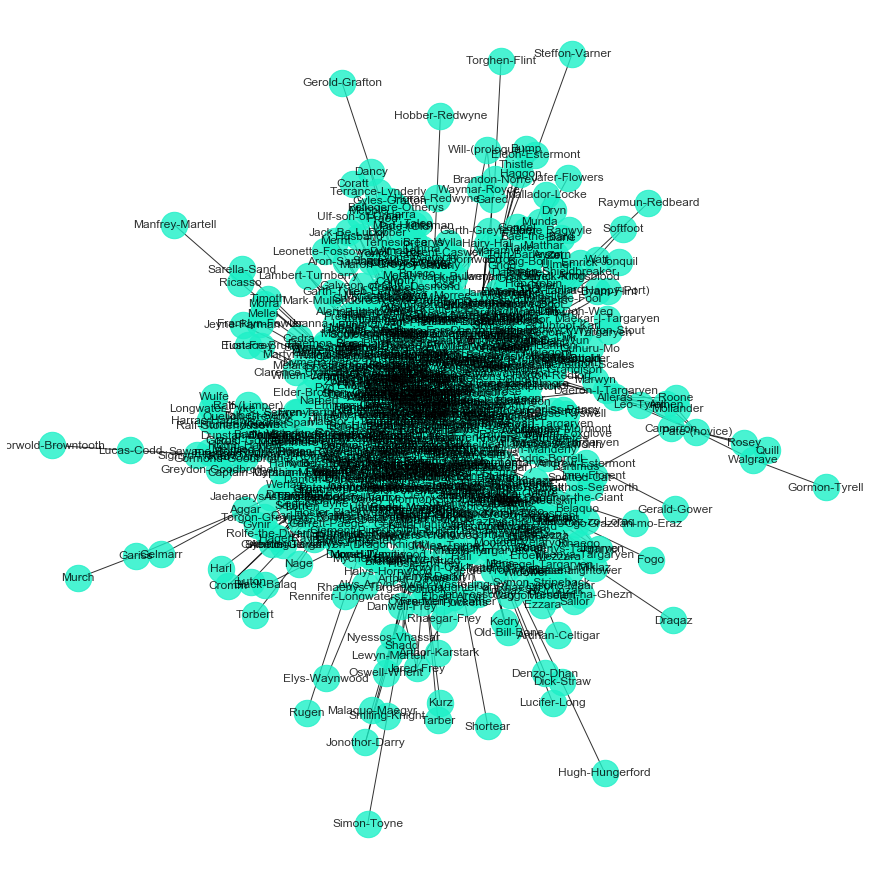

In [26]:
edge_labels = labels = nx.get_edge_attributes(g,'weight')
plt.figure(figsize=(12,12))
nx.draw(g, with_labels=True, pos=nx.spring_layout(g),
        edge_labels=edge_labels, alpha=.8, node_color="#1cf0c7", node_size=700);

## Subsetting the Graph

As you can see, the above graph is undoubtedly noisy, making it difficult to discern any useful patterns. As such, reset the graph and only add edges whose weight is 75 or greater. From there, redraw the graph. To further help with the display, try using `nx.spring_layout(G)` for the position. To jazz it up, try and recolor those nodes which you identified as bridge or bottleneck nodes to communication.

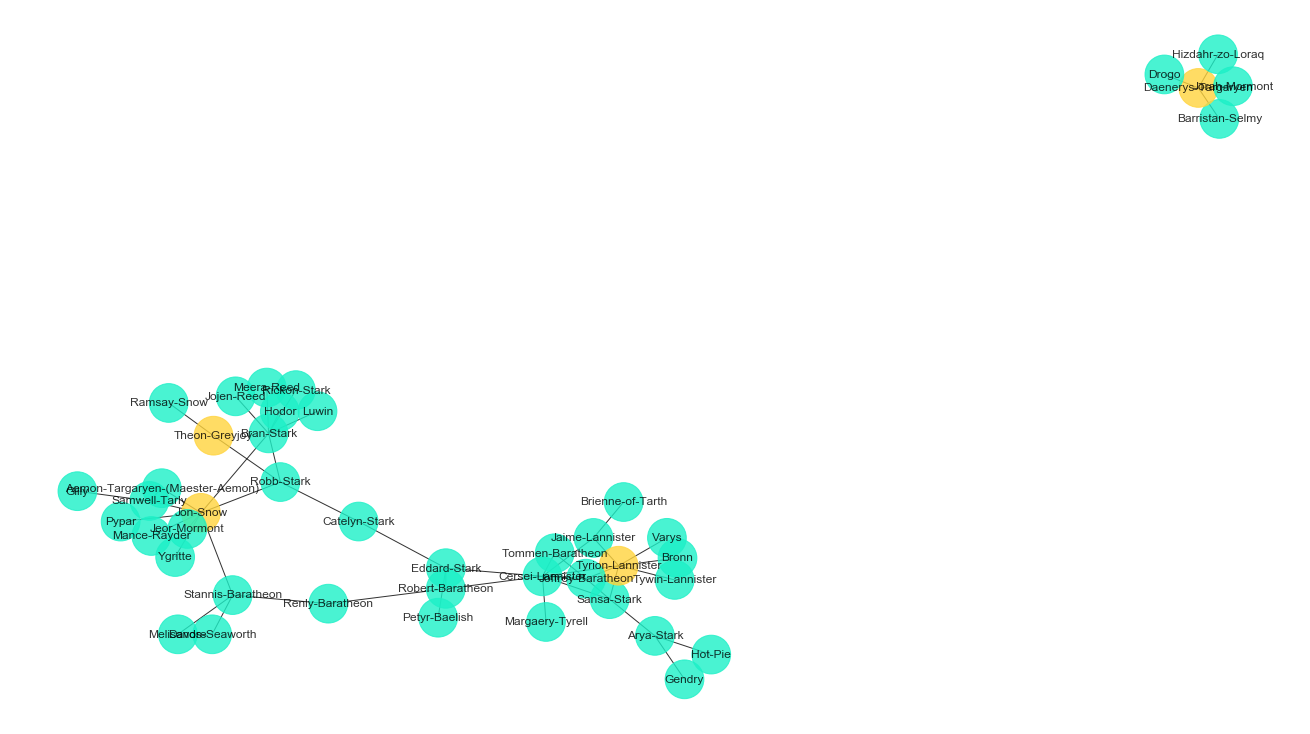

In [31]:
threshold = 75
colors = []
g = nx.Graph()
for row in df1.index:
    source = df1['Source'][row]
    target = df1['Target'][row]
    weight = df1['weight'][row]
    if weight >= threshold:
        g.add_edge(source,target, weight=weight)
edge_labels = labels = nx.get_edge_attributes(g,'weight')
for node in g.nodes:
    if node in df.index[:10]:
        colors.append("#ffd43d")
    else:
        colors.append("#1cf0c7")
plt.figure(figsize=(18,10))
nx.draw(g, with_labels=True, pos=nx.spring_layout(g),
        edge_labels=edge_labels, alpha=.8, node_color=colors, node_size=1500);

## Summary 

In this lab, we looked at different centrality measures of the graph data for the ASIOF dataset. We also compared these measures to see how they correlate with each other. We also saw in practice, the difference between taking the weighted centrality measures and how it may effect the results. 